In [1]:
import os
import cv2
import numpy as np
import pandas as pd

from insightface.app import FaceAnalysis

In [2]:
faceapp = FaceAnalysis(name='buffalo_sc',
                       root='insightface_model',
                       providers=['CPUExecutionProvider'])

faceapp.prepare(ctx_id=0, det_size=(640,640), det_thresh=0.5)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model\models\buffalo_sc\det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model\models\buffalo_sc\w600k_mbf.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [3]:
import re

In [4]:
def clean_name(string):
    string = re.sub(r'[^A-Za-z]',' ',string)
    string = string.upper()
    return string


In [5]:
person_info = []
listdir = os.listdir(path='images')
for folder_name in listdir:
    role, name = folder_name.split('-')
    name = clean_name(name)
    role = clean_name(role)
    #print('Role =',role,end='\t')
    #print('Name =', name)


    img_files = os.listdir(path= f'images/{folder_name}')
    for file in img_files:
        path = f'./images/{folder_name}/{file}'

        img_arr = cv2.imread(path)
        result = faceapp.get(img_arr,max_num=1)
        if len(result) > 0:
            res=result[0]
            embedding = res['embedding']
            person_info.append([name, role, embedding])

        
    

 

In [6]:
dataframe = pd.DataFrame(person_info,columns=['Name', 'Role', 'Facial_Features'])
dataframe

,Name,Role,Facial_Features
0,ANGELINA JOLIE,STUDENT,"[-0.840976, 1.6623011, -0.74578035, -2.1380825..."
1,ANGELINA JOLIE,STUDENT,"[0.09012404, -0.4169108, -0.37650695, 0.424011..."
2,ANGELINA JOLIE,STUDENT,"[0.86389506, 0.32952017, 0.05781859, -1.453824..."
3,ANGELINA JOLIE,STUDENT,"[1.6611172, 1.1610862, -0.41079235, -2.6411536..."
4,ANGELINA JOLIE,STUDENT,"[0.864314, 0.9437618, 0.4265172, -1.1836909, -..."
5,ANGELINA JOLIE,STUDENT,"[0.41072488, 1.1821749, -0.9955386, -1.4014187..."
6,ANGELINA JOLIE,STUDENT,"[0.4228965, 2.084679, 1.0648315, -2.2739332, -..."
7,ANGELINA JOLIE,STUDENT,"[0.39441854, 0.844123, -0.6154812, -2.104783, ..."
8,ANGELINA JOLIE,STUDENT,"[1.0931159, 1.16805, -0.2896319, -2.0099528, -..."
9,ANGELINA JOLIE,STUDENT,"[-0.63542634, 1.7897139, 0.59832734, -3.550089..."


In [7]:
img_test = cv2.imread('./test_images/test_2.jpeg')
cv2.imshow('test image',img_test)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [8]:
res_test = faceapp.get(img_test,max_num=0)
for i, rt in enumerate(res_test):
    print('current loop =',i)
    bbox = rt['bbox'].astype(int)
    score = int(rt['det_score']*100)
    embed_test = rt['embedding']

current loop = 0


In [9]:
embed_test

array([-1.0794209 , -1.106817  , -1.2358055 , -1.1184733 ,  1.6912835 ,
        1.2587602 , -0.42545304,  1.2529421 ,  1.9019961 ,  1.1875618 ,
       -2.2458298 ,  2.0359764 , -0.16769719,  0.5307629 ,  0.30050385,
       -0.21242332,  0.30540988, -1.0245438 ,  0.23911111,  1.2249293 ,
       -0.31456357, -1.1223117 ,  2.434485  ,  1.0285479 ,  0.6132133 ,
       -1.2184056 ,  1.4724448 , -0.37911248, -1.1318517 ,  1.2429032 ,
        1.1630024 ,  0.4936406 ,  0.96875656,  0.03858541,  0.40804625,
       -0.41315195,  0.0175181 ,  0.35681504,  0.91274524, -0.13435462,
       -1.5694399 ,  1.4076433 ,  0.95215726, -0.38525414,  0.08780497,
       -0.47189492, -0.20714593,  1.118402  ,  0.775218  , -0.74888206,
       -2.0983334 ,  0.99330544, -1.8608006 , -2.0646064 , -0.8853907 ,
       -0.03325728,  2.255765  ,  0.24467283, -0.39156628, -1.2572623 ,
       -0.8227543 ,  0.22220078,  0.57083416,  0.37354052, -1.1787844 ,
        0.8612194 ,  0.08324359,  0.71663344,  1.3165777 ,  0.48

In [10]:
len(embed_test)

512

In [11]:
X_List = dataframe['Facial_Features'].tolist()
X = np.asarray(X_List)

In [12]:
 X.shape

(50, 512)

In [12]:
from sklearn.metrics import pairwise

In [13]:

y = embed_test.reshape(1,512)
equlidean_distance = pairwise.euclidean_distances(X,y)
manhattan_distance = pairwise.manhattan_distances(X,y)
cosine_similar = pairwise.cosine_similarity(X,y)

In [14]:
data_search = dataframe.copy()
data_search['equlidean'] = equlidean_distance
data_search['manhattan'] = manhattan_distance
data_search['cosine'] = cosine_similar

In [16]:
data_search

,Name,Role,Facial_Features,equlidean,manhattan,cosine
0,ANGELINA JOLIE,STUDENT,"[-0.840976, 1.6623011, -0.74578035, -2.1380825...",30.831608,550.446653,-0.011336
1,ANGELINA JOLIE,STUDENT,"[0.09012404, -0.4169108, -0.37650695, 0.424011...",30.680958,555.258290,0.018317
2,ANGELINA JOLIE,STUDENT,"[0.86389506, 0.32952017, 0.05781859, -1.453824...",31.644897,574.439401,-0.009939
3,ANGELINA JOLIE,STUDENT,"[1.6611172, 1.1610862, -0.41079235, -2.6411536...",31.804695,581.380992,0.033799
4,ANGELINA JOLIE,STUDENT,"[0.864314, 0.9437618, 0.4265172, -1.1836909, -...",31.845743,575.526853,-0.011627
5,ANGELINA JOLIE,STUDENT,"[0.41072488, 1.1821749, -0.9955386, -1.4014187...",31.448256,563.773013,-0.019591
6,ANGELINA JOLIE,STUDENT,"[0.4228965, 2.084679, 1.0648315, -2.2739332, -...",30.735941,559.293373,-0.002086
7,ANGELINA JOLIE,STUDENT,"[0.39441854, 0.844123, -0.6154812, -2.104783, ...",30.919462,568.305766,-0.002109
8,ANGELINA JOLIE,STUDENT,"[1.0931159, 1.16805, -0.2896319, -2.0099528, -...",32.054050,575.020484,-0.028779
9,ANGELINA JOLIE,STUDENT,"[-0.63542634, 1.7897139, 0.59832734, -3.550089...",33.458736,599.186356,-0.032620


In [15]:
import matplotlib.pyplot as plt

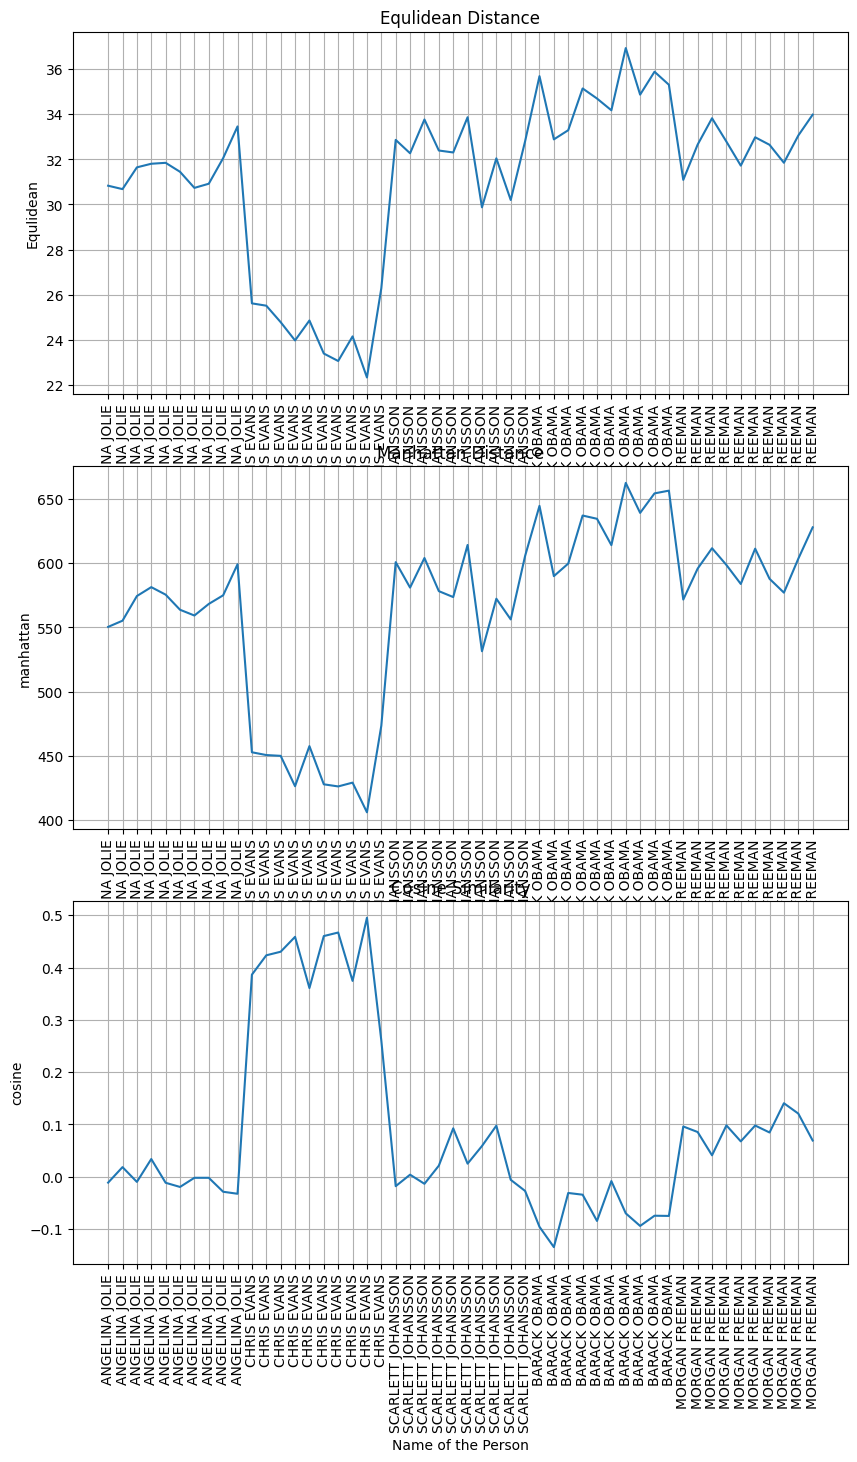

In [16]:
plt.figure(figsize=(10,16))
plt.subplot(3,1,1)
plt.plot(data_search['equlidean'])
plt.xticks(ticks=list(range(len(data_search['equlidean']))), labels=data_search['Name'],rotation=90)
plt.xlabel('Name of the Person')
plt.ylabel('Equlidean')
plt.title('Equlidean Distance')
plt.grid()

plt.subplot(3,1,2)
plt.plot(data_search['manhattan'])
plt.xticks(ticks=list(range(len(data_search['equlidean']))), labels=data_search['Name'],rotation=90)
plt.xlabel('Name of the Person')
plt.ylabel('manhattan')
plt.title('Manhattan Distance')
plt.grid()

plt.subplot(3,1,3)
plt.plot(data_search['cosine'])
plt.xticks(ticks=list(range(len(data_search['equlidean']))), labels=data_search['Name'],rotation=90)
plt.xlabel('Name of the Person')
plt.ylabel('cosine')
plt.title('Cosine Similarity')
plt.grid()

plt.show()

In [17]:
d_eq_optimal = 25

datafilter = data_search.query(f'equlidean < {d_eq_optimal}')
datafilter.reset_index(drop=True,inplace=True)
datafilter

if len(datafilter) > 0:
    argmin = datafilter['equlidean'].argmin()
    print(datafilter.loc[argmin])

In [18]:
datafilter = data_search.query(f'equlidean < {d_eq_optimal}')
datafilter.reset_index(drop=True,inplace=True) 

if len(datafilter) > 0: 
    argmin = datafilter['equlidean'].argmin()
    name, role = datafilter.loc[argmin][['Name','Role']]

else:
    name = 'Unknown'
    role = 'Unknown'

In [19]:
print(name,role)

CHRIS EVANS STUDENT


In [20]:
d_man_optimal = 450

In [21]:
datafilter = data_search.query(f'manhattan < {d_man_optimal}')
datafilter.reset_index(drop=True,inplace=True) 

if len(datafilter) > 0: 
    argmin = datafilter['manhattan'].argmin()
    name, role = datafilter.loc[argmin][['Name','Role']]

else:
    name = 'Unknown'
    role = 'Unknown'

In [22]:
print(name,role)

CHRIS EVANS STUDENT


In [23]:
S_opt = 0.5

In [24]:
datafilter = data_search.query(f'cosine < {S_opt}')
datafilter.reset_index(drop=True,inplace=True) 

if len(datafilter) > 0: 
    argmax = datafilter['cosine'].argmax()
    name_cos, role_cos = datafilter.loc[argmax][['Name','Role']]

else:
    name_cos = 'Unknown'
    role_cos = 'Unknown'

In [25]:
print(name_cos, role_cos)

CHRIS EVANS STUDENT


In [26]:
#step-1:take the dataframe 
#step-2:index face embeding from the dataframe and convert into array
#step-3:cal.cosine similarity
#step-4:filter the data
#step-5:get the person name

In [27]:
def ml_search_algorithm(dataframe,feature_column,test_vector,
                        name_role=['Name','Role'],thresh=0.5):
    dataframe = dataframe.copy()
    X_list = dataframe[feature_column].tolist()
    x = np.asarray(X_list)

    similar = pairwise.cosine_similarity(x,test_vector.reshape(1,-1))
    similar_arr = np.array(similar).flatten()
    dataframe['cosine'] = similar_arr
    data_filter = dataframe.query(f'cosine >= {thresh}')
    if len(data_filter) > 0:
        data_filter.reset_index(drop=True,inplace=True)
        argmax = data_filter['cosine'].argmax()
        person_name, person_role = data_filter.loc[argmax][['Name','Role']]

    else:
        person_name = 'Unknown'
        person_role = 'Unknown'

    return person_name, person_role
  







In [28]:
test_image = cv2.imread('test_images/test_11.jpg')
cv2.imshow('test image',test_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [29]:
#step1:take the test imaga and apply to insight face
results = faceapp.get(test_image)
test_copy = test_image.copy()

#step2:use for loop and extract each embedding and pass to ml_search algorithm
for res in results:
    x1, y1, x2, y2 = res['bbox'].astype(int)
    embeddings = res['embedding']
    person_name, person_role = ml_search_algorithm(dataframe,
                                                   'Facial_Features',
                                                   test_vector=embeddings,
                                                   name_role=['Name','Role'],
                                                   thresh=0.5)
    if person_name == 'Unknown':
        color =(0,0,255)

    else:
        color = (0,255,0)
        
    cv2.rectangle(test_copy,(x1,y1),(x2,y2),color)

    text_gen = person_name
    cv2.putText(test_copy,text_gen,(x1,y1),cv2.FONT_HERSHEY_DUPLEX,0.7,color,2)

cv2.imshow('test image',test_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()
    

In [30]:
dataframe_compress = dataframe.groupby(by=['Name','Role']).mean()
dataframe_compress.reset_index(inplace=True)
dataframe_compress

,Name,Role,Facial_Features
0,ANGELINA JOLIE,STUDENT,"[0.43242034, 1.0748498, -0.12862365, -1.833291..."
1,BARACK OBAMA,TEACHER,"[0.94858104, -0.5584052, 0.094820715, -1.27965..."
2,CHRIS EVANS,STUDENT,"[0.7201715, -1.4684149, -0.7781253, -1.4601073..."
3,MORGAN FREEMAN,TEACHER,"[0.48535103, -0.6192555, -0.4069932, 1.0687788..."
4,SCARLETT JOHANSSON,STUDENT,"[0.19131963, -0.48843804, -1.690233, 0.4423967..."


In [31]:
xvalues =dataframe_compress.values

In [32]:
xvalues

array([['ANGELINA JOLIE', 'STUDENT',
        array([ 4.32420343e-01,  1.07484984e+00, -1.28623649e-01, -1.83329177e+00,
               -7.27802396e-01, -1.23429465e+00, -2.34313130e-01, -3.72791916e-01,
               -6.96481943e-01, -3.52696538e-01, -1.86347470e-01, -8.56500149e-01,
               -7.25770116e-01,  1.59811723e+00,  1.89706221e-01, -8.70287344e-02,
               -8.61652046e-02,  9.59016308e-02, -4.32294518e-01,  5.76181002e-02,
                1.06183112e-01, -1.08450246e+00, -3.68749082e-01, -3.46378684e-01,
                5.48185408e-01, -3.21397752e-01,  1.65740907e+00,  3.66979212e-01,
                9.40395176e-01,  1.18225420e+00,  4.02732939e-01,  5.15204966e-01,
                2.07558203e+00, -1.63649404e+00, -1.61218062e-01, -9.74149257e-02,
               -7.65306175e-01,  7.55763650e-01, -1.70574951e+00,  2.01980740e-01,
               -1.64433122e+00,  5.47630787e-01,  2.28763938e-01, -3.25343072e-01,
                1.90978810e-01,  3.11371267e-01, -

In [33]:
col_name = np.array(dataframe_compress.columns)
col_name

array(['Name', 'Role', 'Facial_Features'], dtype=object)

In [34]:
np.savez('dataframe_students_teacher.npz',xvalues,col_name)

In [35]:
#load the numpy zip
file_np = np.load('dataframe_students_teacher.npz',allow_pickle=True)
file_np.files

['arr_0', 'arr_1']

In [36]:
pd.DataFrame(file_np['arr_0'],columns=file_np['arr_1'])

,Name,Role,Facial_Features
0,ANGELINA JOLIE,STUDENT,"[0.43242034, 1.0748498, -0.12862365, -1.833291..."
1,BARACK OBAMA,TEACHER,"[0.94858104, -0.5584052, 0.094820715, -1.27965..."
2,CHRIS EVANS,STUDENT,"[0.7201715, -1.4684149, -0.7781253, -1.4601073..."
3,MORGAN FREEMAN,TEACHER,"[0.48535103, -0.6192555, -0.4069932, 1.0687788..."
4,SCARLETT JOHANSSON,STUDENT,"[0.19131963, -0.48843804, -1.690233, 0.4423967..."
